In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("Russian Housing Market/data.csv")
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,20/08/2011,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000.0
1,2,23/08/2011,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000.0
2,3,27/08/2011,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000.0
3,4,1/09/2011,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000.0
4,5,5/09/2011,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452.0


In [100]:
# Examine the attributes of the dataset
print("{:<20}".format("Attributes of the Russian Housing Market Dataset"))
print("{:<20}".format("------"))
for col in list(df.columns):
    print("{:<20}".format(col))

Attributes of the Russian Housing Market Dataset
------              
id                  
timestamp           
full_sq             
life_sq             
floor               
max_floor           
material            
build_year          
num_room            
kitch_sq            
state               
product_type        
sub_area            
area_m              
raion_popul         
green_zone_part     
indust_part         
children_preschool  
preschool_quota     
preschool_education_centers_raion
children_school     
school_quota        
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion 
healthcare_centers_raion
university_top_20_raion
sport_objects_raion 
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion        
thermal_power_plant_raion
incineration_raion  
oil_chemistry_raion 
radiation_raion     
railroad_terminal_raion
big_market_raion    
nuclear_reactor_raion
detention_facili

In [101]:
numeric_columns = df.select_dtypes(exclude=['object']).columns
numeric_columns = numeric_columns[1:]

summaries = []
for attribute in numeric_columns:
    summaries.append(df[attribute].describe())
    print(f'{attribute}\n\nMin: {summaries[-1][3]}\n25%: {summaries[-1][4]}\n50%: {summaries[-1][5]}\n'
          f'75%: {summaries[-1][6]}\nMax: {summaries[-1][7]}\n'
          f'Count: {summaries[-1][0]}\nMean: {summaries[-1][1]}\nStd: {summaries[-1][2]}\n'
          f'--------------------------')


full_sq

Min: 0.0
25%: 38.9
50%: 50.0
75%: 63.0
Max: 5326.0
Count: 38133.0
Mean: 54.11117195080376
Std: 35.17116183363769
--------------------------
life_sq

Min: 0.0
25%: 20.0
50%: 30.0
75%: 43.0
Max: 7478.0
Count: 30574.0
Mean: 34.03345980244652
Std: 47.58152882390085
--------------------------
floor

Min: 0.0
25%: 3.0
50%: 7.0
75%: 11.0
Max: 77.0
Count: 37966.0
Mean: 7.667123215508613
Std: 5.276156463761862
--------------------------
max_floor

Min: 0.0
25%: 9.0
50%: 12.0
75%: 17.0
Max: 117.0
Count: 28561.0
Mean: 12.567592171142467
Std: 6.730495638851137
--------------------------
material

Min: 1.0
25%: 1.0
50%: 1.0
75%: 2.0
Max: 6.0
Count: 28561.0
Mean: 1.834389552186548
Std: 1.4909233150289796
--------------------------
build_year

Min: 0.0
25%: 1966.0
50%: 1980.0
75%: 2006.0
Max: 20052009.0
Count: 23479.0
Mean: 2716.784530857362
Std: 130852.09296841593
--------------------------
num_room

Min: 0.0
25%: 1.0
50%: 2.0
75%: 2.0
Max: 19.0
Count: 28561.0
Mean: 1.9008438079899164
Std: 

build_count_1946-1970

Min: 0.0
25%: 30.0
50%: 139.0
75%: 216.0
Max: 845.0
Count: 31924.0
Mean: 143.80303220147852
Std: 124.39747029732251
--------------------------
build_count_1971-1995

Min: 0.0
25%: 38.0
50%: 71.0
75%: 125.0
Max: 246.0
Count: 31924.0
Mean: 80.70871444681117
Std: 57.434917953461024
--------------------------
build_count_after_1995

Min: 0.0
25%: 14.0
50%: 24.0
75%: 57.0
Max: 799.0
Count: 31924.0
Mean: 62.494486906402706
Std: 115.04494082303047
--------------------------
ID_metro

Min: 1.0
25%: 26.0
50%: 53.0
75%: 108.0
Max: 224.0
Count: 38133.0
Mean: 72.07833110429287
Std: 55.049019529544324
--------------------------
metro_min_avto

Min: 0.0
25%: 1.7193125280000001
50%: 2.769541598
75%: 4.788852836
Max: 65.1011247
Count: 38133.0
Mean: 4.9027017170742395
Std: 6.473965157646862
--------------------------
metro_km_avto

Min: 0.0
25%: 1.036567808
50%: 1.770571527
75%: 3.7768359589999996
Max: 74.90576341
Count: 38133.0
Mean: 3.6829965605403197
Std: 5.8379365276633735
--

prom_part_500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 5.99
Max: 99.17
Count: 38133.0
Mean: 6.43199774473553
Std: 13.222467277737199
--------------------------
office_count_500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 34.0
Count: 38133.0
Mean: 0.7548055489995542
Std: 2.2862602750777894
--------------------------
office_sqm_500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 611015.0
Count: 38133.0
Mean: 14313.817061337948
Std: 42767.05383786059
--------------------------
trc_count_500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 1.0
Max: 8.0
Count: 38133.0
Mean: 0.562164004930113
Std: 1.2397263767475624
--------------------------
trc_sqm_500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 1465.0
Max: 1500000.0
Count: 38133.0
Mean: 22313.819237930402
Std: 82922.40043210553
--------------------------
cafe_count_500

Min: 0.0
25%: 0.0
50%: 1.0
75%: 3.0
Max: 120.0
Count: 38133.0
Mean: 3.9197283193034904
Std: 11.33370787688549
--------------------------
cafe_sum_500_min_price_avg

Min: 300.0
25%: 500.0
50%: 668.75
75%: 977.78
Max

--------------------------
cafe_count_1500_price_4000

Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 58.0
Count: 38133.0
Mean: 1.4764115070935935
Std: 6.768310658193006
--------------------------
cafe_count_1500_price_high

Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 12.0
Count: 38133.0
Mean: 0.1963129048330842
Std: 0.9111706031807632
--------------------------
big_church_count_1500

Min: 0.0
25%: 0.0
50%: 1.0
75%: 1.0
Max: 44.0
Count: 38133.0
Mean: 2.0116434584218394
Std: 6.522143993802641
--------------------------
church_count_1500

Min: 0.0
25%: 1.0
50%: 1.0
75%: 3.0
Max: 75.0
Count: 38133.0
Mean: 3.7116146120158393
Std: 9.805760174489802
--------------------------
mosque_count_1500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
Max: 1.0
Count: 38133.0
Mean: 0.03789368788188708
Std: 0.1909416465679237
--------------------------
leisure_count_1500

Min: 0.0
25%: 0.0
50%: 0.0
75%: 1.0
Max: 44.0
Count: 38133.0
Mean: 0.9605328717908374
Std: 3.369829928853683
--------------------------
sport_count_1500



cafe_sum_5000_max_price_avg

Min: 500.0
25%: 1145.95
50%: 1220.085
75%: 1354.17
Max: 3000.0
Count: 37708.0
Mean: 1279.6406635196774
Std: 233.0904801156635
--------------------------
cafe_avg_price_5000

Min: 400.0
25%: 909.38
50%: 973.25
75%: 1091.67
Max: 2437.5
Count: 37708.0
Mean: 1022.647294738517
Std: 191.40345692714735
--------------------------
cafe_count_5000_na_price

Min: 0.0
25%: 1.0
50%: 9.0
75%: 15.0
Max: 174.0
Count: 38133.0
Mean: 18.20161015393491
Std: 33.53922992420909
--------------------------
cafe_count_5000_price_500

Min: 0.0
25%: 5.0
50%: 29.0
75%: 61.0
Max: 650.0
Count: 38133.0
Mean: 67.5632129651483
Std: 127.00369978313849
--------------------------
cafe_count_5000_price_1000

Min: 0.0
25%: 8.0
50%: 37.0
75%: 70.0
Max: 648.0
Count: 38133.0
Mean: 74.8153567775942
Std: 127.25138528246472
--------------------------
cafe_count_5000_price_1500

Min: 0.0
25%: 6.0
50%: 25.0
75%: 51.0
Max: 643.0
Count: 38133.0
Mean: 64.68793433509035
Std: 125.21409195682493
-------------

## Noisy Data

In [102]:
df.loc[(df["build_year"] > 2019) | (df.build_year < 1850)]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
9441,9444,25/07/2013,73.00,73.00,5.0,22.0,1.0,0.0,3.0,0.0,...,1,1,0,1,7,0,0,6,0,5626933.0
9620,9623,5/08/2013,65.00,35.00,7.0,12.0,1.0,1.0,2.0,1.0,...,10,3,0,10,9,0,0,38,4,5415070.0
9700,9703,8/08/2013,60.00,NaN,24.0,24.0,1.0,1.0,2.0,1.0,...,1,1,0,1,7,0,0,6,0,5402275.0
9745,9748,9/08/2013,39.00,39.00,10.0,17.0,1.0,1.0,1.0,12.0,...,1,0,0,2,3,0,0,6,1,3984760.0
9764,9767,12/08/2013,119.00,NaN,24.0,1.0,1.0,1.0,1.0,1.0,...,11,2,1,5,4,0,1,32,5,15696466.0
10089,10092,27/08/2013,37.00,16.00,8.0,12.0,1.0,20052009.0,1.0,9.0,...,46,8,2,10,31,2,7,91,11,9000000.0
10122,10125,28/08/2013,27.00,27.00,5.0,12.0,6.0,1.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2061954.0
10142,10145,29/08/2013,60.00,60.00,11.0,0.0,4.0,0.0,2.0,0.0,...,1,0,0,2,3,0,0,6,1,6518400.0
10260,10263,4/09/2013,40.00,NaN,7.0,17.0,1.0,0.0,1.0,0.0,...,1,0,0,1,7,0,0,8,0,3713560.0
10294,10297,5/09/2013,37.00,37.00,16.0,0.0,1.0,0.0,1.0,0.0,...,1,0,0,2,3,0,0,6,1,4061390.0


In [103]:
df.loc[df.state > 4]["state"]

10089    33.0
Name: state, dtype: float64

### Correlation Between House Attributes and price

### Price Analysis

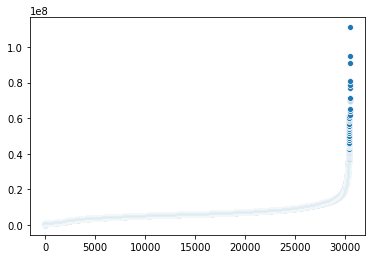

In [104]:
sns.scatterplot(range(df.shape[0]), np.sort(df.price_doc.values))

### Full Square Meters

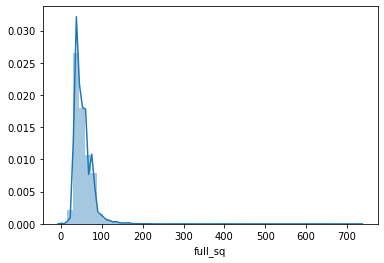

In [82]:
# sns.distplot(df.loc[df["full_sq"] > 1])
sns.distplot(df.loc[(df["full_sq"] > 0.1) & (df['full_sq'] < 1000)]["full_sq"])

### Life Square Meters

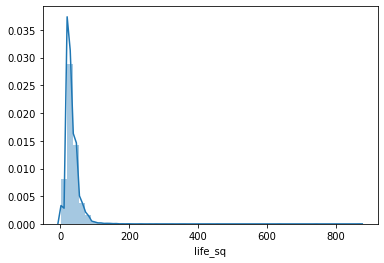

In [83]:
sns.distplot(df.loc[(df["life_sq"] > 0.1) & (df['life_sq'] < 1000)]["life_sq"])

### 

In [14]:
np.corrcoef(df['price_doc'], df['build_year'])[0, 1]
# df['price_doc']
# df['build_year']
df['price_doc'].corr(df['build_year'])
print("Merge Test")

0.0021609351678540524